In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

In [2]:
plt.style.use(['science'])
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'

In [3]:
import spin_models as spin

In [4]:
import scipy.stats as stats

In [75]:
N_sample = 100000

theta_binsize = 2
theta_max = 90
theta_min = -2
theta_num = int((theta_max-theta_min)/theta_binsize)


theta_rd = np.arccos(stats.uniform(-1,2).rvs(N_sample))
theta_rd = theta_rd * 180/np.pi
for i in range(len(theta_rd)):
    if theta_rd[i] > 90:
        theta_rd[i] = 180 - theta_rd[i]
theta_rd_counts,theta_rd_edges = np.histogram(theta_rd,range=(theta_min,theta_max),bins=theta_num,density=True)
theta_rd_bins = theta_rd_edges[:-1] + (theta_rd_edges[1] - theta_rd_edges[0])/2

alpha = 8
beta = 4
a_rd = stats.beta(alpha,beta).rvs(N_sample)
a_rd_counts,a_rd_edges = np.histogram(a_rd,range=(0,1.1),bins=35,density=True)
a_rd_bins = a_rd_edges[:-1] + (a_rd_edges[1] - a_rd_edges[0])/2

alpha = 2.544
beta = 19.527
cold = stats.beta(alpha,beta).rvs(N_sample)
cold = cold * 180/np.pi
cold_counts,cold_edges = np.histogram(cold,range=(theta_min,theta_max),bins=theta_num,density=True)
cold_bins = cold_edges[:-1] + (cold_edges[1] - cold_edges[0])/2

alpha = 5.935
beta = 1.856
a_cold = stats.beta(alpha,beta).rvs(N_sample)
a_cold_counts,a_cold_edges = np.histogram(a_cold,range=(0,1.1),bins=35,density=True)
a_cold_bins = a_cold_edges[:-1] + (a_cold_edges[1] - a_cold_edges[0])/2

loc = np.cos(5*np.pi/180)
scale = np.cos(0) - np.cos(5*np.pi/180)
theta_5deg = np.arccos(stats.uniform(loc,scale).rvs(N_sample*10))
theta_5deg = theta_5deg * 180/np.pi
theta5deg_counts,theta_5deg_edges = np.histogram(theta_5deg,range=(theta_min,theta_max),bins=theta_num,density=True)
theta5deg_bins = theta_5deg_edges[:-1] + (theta_5deg_edges[1] - theta_5deg_edges[0])/2

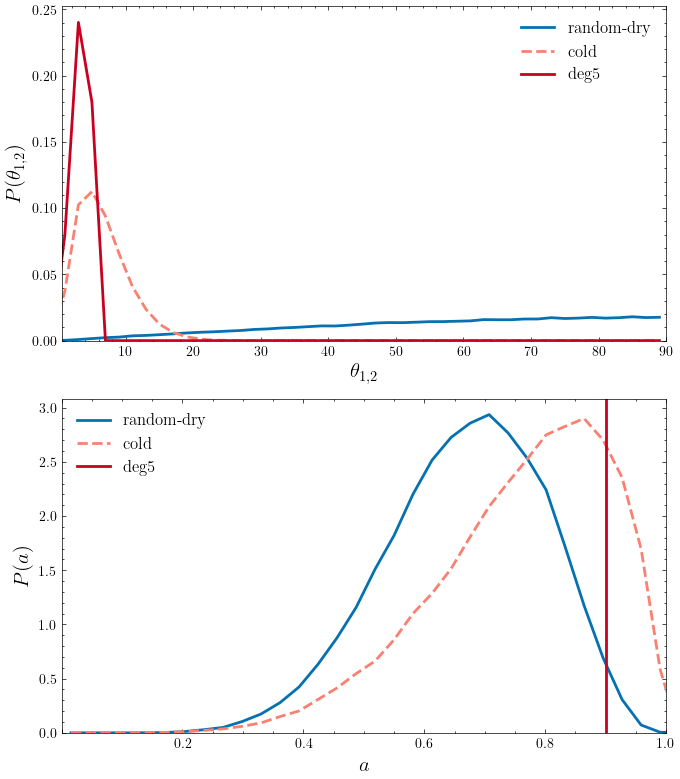

In [83]:
fig,ax = plt.subplots(2,1,figsize=(7,8))
ax[1].plot(a_rd_bins,a_rd_counts,color="#0571b0",lw=2,label="random-dry")
ax[1].plot(a_cold_bins,a_cold_counts,color="salmon",linestyle="--",lw=2,label="cold")
ax[1].axvline(x=0.9,color="#ca0020",lw=2,label="deg5")
ax[1].set_xlim(0,1)
ax[1].set_ylim(0,)
ax[1].legend(fontsize=12)
ax[1].set_ylabel(r"$P(a)$",fontsize=15)
ax[1].set_xlabel(r"$a$",fontsize=15)
ax[1] = plt.gca()
xticks = ax[1].xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)

ax[0].plot(theta_rd_bins,theta_rd_counts,color="#0571b0",lw=2,label="random-dry")
ax[0].plot(cold_bins,cold_counts,color="salmon",lw=2,linestyle="--",label="cold")
ax[0].plot(theta5deg_bins,theta5deg_counts,color="#ca0020",lw=2,label="deg5")
ax[0].set_xlim(0.5,90)
ax[0].set_ylim(0,)
ax[0].legend(fontsize=12)
ax[0].set_ylabel(r"$P(\theta_{1,2})$",fontsize=15)
ax[0].set_xlabel(r"$\theta_{1,2}$",fontsize=15)

fig.tight_layout()
plt.savefig("Figures/spin-models-magnitude-and-angle.pdf")

In [1]:
import BH_binary_kicks_data as gw_kick
import BH_triple_kicks_data as trip_kick

In [2]:
Binary_filename = "/Users/pranavsatheesh/Triples/Github/Illustris_Data/iso_binaries_data_from_ill.csv"
triple_filename = "/Users/pranavsatheesh/Triples/Github/Triple-Outcomes/Data/Triple_outcomes_N_100.csv"

In [3]:
df_trip_kick = trip_kick.trip_kick_assign(triple_filename)
df_trip_kick.head()

,M1,M2,M3,qin,qout,Slingshot_kick,gw_kick_random,gw_kick_cold,gw_kick_5deg,z_triple,a_triple,merger_flag
0,2.119978e+07,3.473441e+06,2.463118e+07,0.163843,0.998296,8596.591090,0.0,0.0,0.0,4.507494,0.006986,No
1,2.391268e+08,1.296146e+08,1.287504e+07,0.542033,0.034916,803.621211,0.0,0.0,0.0,1.083700,0.216358,No
2,2.122135e+08,1.477407e+08,6.859143e+06,0.696189,0.019056,1611.662895,0.0,0.0,0.0,0.229301,0.056611,No
3,8.239502e+07,5.113722e+07,4.296126e+06,0.620635,0.032173,851.491213,0.0,0.0,0.0,0.053799,0.072537,No
4,4.625245e+07,8.973635e+06,2.419779e+06,0.194014,0.043816,270.385087,0.0,0.0,0.0,1.932992,0.169430,No


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

In [5]:
len(df_trip_kick)
Nruns = 100
Ntriples = int(len(df_trip_kick["M1"])/Nruns)

In [6]:
for i in range(Nruns):
   slingshot_kicks = df_trip_kick[i*Ntriples:(i+1)*Ntriples]["Slingshot_kick"]
   slingshot_kicks = slingshot_kicks[slingshot_kicks!=0]
   print(slingshot_kicks)

0        8596.591090
1         803.621211
2        1611.662895
3         851.491213
4         270.385087
           ...      
513    133371.425378
514      2680.781854
516       666.054238
518      1564.611848
519      7335.875781
Name: Slingshot_kick, Length: 424, dtype: float64
520     8596.591090
521      803.621211
522     1611.662895
523      851.491213
524      270.385087
           ...     
1035    1604.783053
1036     666.054238
1037     137.770169
1038    1564.611848
1039    7335.875781
Name: Slingshot_kick, Length: 417, dtype: float64
1040      8596.591090
1041       803.621211
1042      1611.662895
1043       851.491213
1044       270.385087
            ...      
1553    133371.425378
1554      2680.781854
1556       666.054238
1558      1564.611848
1559      7335.875781
Name: Slingshot_kick, Length: 430, dtype: float64
1560    8596.591090
1561     803.621211
1562    1611.662895
1563     851.491213
1564     270.385087
           ...     
2074    2680.781854
2076     666.0542

In [27]:
v_max = 6
v_min = 1
v_binsize = 0.15
vcount = []
for i in range(Nruns):
   slingshot_kicks = df_trip_kick[i*Ntriples:(i+1)*Ntriples]["Slingshot_kick"]
   slingshot_kicks=slingshot_kicks[slingshot_kicks!=0]
   bincounts,binedges = np.histogram(np.log10(slingshot_kicks),range=(v_min,v_max),bins=int((v_max-v_min)/v_binsize),density=True)
   bins = binedges[:-1] + (binedges[1] - binedges[0])/2
   vcount.append(bincounts)  

In [28]:
import scipy.stats as st

def fit_norm(x,mu,sigma):
    return st.norm.pdf(x,mu,sigma)


In [29]:
df_trip = pd.read_csv("Data/TripleBH_velocity_modified.csv")
df_trip.head()
logv = (df_trip['logv'][1::2].to_numpy() + df_trip['logv'][0::2].to_numpy())/2
percent = (df_trip['outcome'][::2].to_numpy() + df_trip['outcome'][1::2].to_numpy())/2
normalization_factor = np.trapz(percent,logv)
percent = percent/normalization_factor


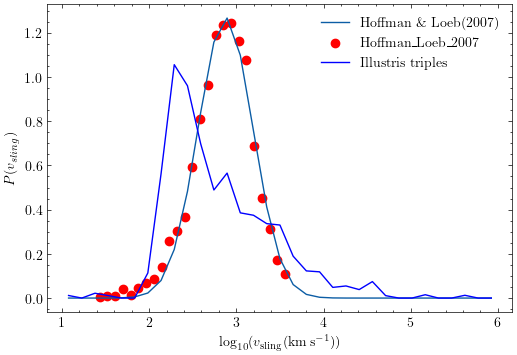

In [30]:
params=[2.87678065,0.31454837]
plt.figure(figsize=[6,4])
plt.plot(bins,fit_norm(bins,params[0],params[1]),label="Hoffman \& Loeb(2007)")
plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
#plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.plot(bins,np.mean(vcount,axis=0),color="blue",label="Illustris triples")
plt.xlabel(r"$\log_{10}(v_{\text{sling}} (\text{km} \, \text{s}^{-1}))$")
plt.ylabel("$P(v_{sling})$")
plt.legend()
#plt.savefig("Figures/Ill_v_HL_slingshot_velocity_dist.pdf")

In [ ]:
params=[2.87678065,0.31454837]
plt.figure(figsize=[6,4])
plt.plot(bins,fit_norm(bins,params[0],params[1]),label="Hoffman \& Loeb(2007)")
#plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.plot(bins,np.mean(vcount,axis=0),color="blue",label="Illustris triples")
plt.xlabel(r"$\log_{10}(v_{\text{sling}} (\text{km} \, \text{s}^{-1}))$")
plt.ylabel("$P(v_{sling})$")
plt.legend()
plt.savefig("Figures/Ill_v_HL_slingshot_velocity_dist.pdf")

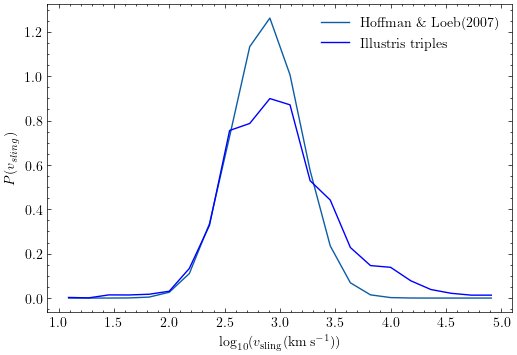

In [ ]:
params=[2.87678065,0.31454837]
plt.figure(figsize=[6,4])
plt.plot(bins,fit_norm(bins,params[0],params[1]),label="Hoffman \& Loeb(2007)")
#plt.scatter(logv,percent,color="red",label="Hoffman_Loeb_2007")
plt.plot(bins,np.mean(vcount,axis=0),color="blue",label="Illustris triples")
plt.xlabel(r"$\log_{10}(v_{\text{sling}} (\text{km} \, \text{s}^{-1}))$")
plt.ylabel("$P(v_{sling})$")
plt.legend()
plt.savefig("Figures/Ill_v_HL_slingshot_velocity_dist.pdf")